# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
counts = Counter(data["Class"])
counts

Counter({0: 284315, 1: 492})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Данные чистые

In [ ]:
data.isna().mean().sum()

0.0

Разделим данные на тренировочную и тестовую части

In [ ]:
X = data.drop(columns=['Class']) 
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [ ]:
const_pred = np.zeros(len(X_test))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
knn_pred_proba = knn.predict_proba(X_test)[:, 1]

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_pred_proba = logreg.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
bin_metrics = {"LogLos": log_loss, "Accuracy": accuracy_score, 
               "Precision": precision_score, "Recall": recall_score, 
               "F1": f1_score}

for name_metric, metric in bin_metrics.items():
  print(name_metric)
  print(f"Const = {metric(y_test, const_pred)}")
  print(f"KNN = {metric(y_test, knn_pred)}")
  print(f"LogReg = {metric(y_test, logreg_pred)}")
  print()

print("ROC-AUC")
print(f"Const = {roc_auc_score(y_test, const_pred)}")
print(f"KNN = {roc_auc_score(y_test, knn_pred_proba)}")
print(f"LogReg = {roc_auc_score(y_test, logreg_pred_proba)}")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogLos
Const = 0.05942207237634395
KNN = 0.05639033398979583
LogReg = 0.047295610138568644

Accuracy
Const = 0.9982795547909132
KNN = 0.9983673326077034
LogReg = 0.9986306660580738

Precision
Const = 0.0
KNN = 1.0
LogReg = 0.6111111111111112

Recall
Const = 0.0
KNN = 0.05102040816326531
LogReg = 0.5612244897959183

F1
Const = 0.0
KNN = 0.09708737864077671
LogReg = 0.5851063829787235

ROC-AUC
Const = 0.5
KNN = 0.6010812227958149
LogReg = 0.9009455428203921


ROC-кривые

In [ ]:
def draw_roc_curve(pred, title):
  fpr, tpr, thresholds = roc_curve(y_test, pred)
  plt.plot(fpr, tpr, 'b', linewidth=3)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot([0, 0], [0, 1], 'k')
  plt.plot([1, 1], [0, 1], 'k')
  plt.plot([0, 1], [0, 0], 'k')
  plt.plot([0, 1], [1, 1], 'k')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.axis('equal')
  plt.title(title)

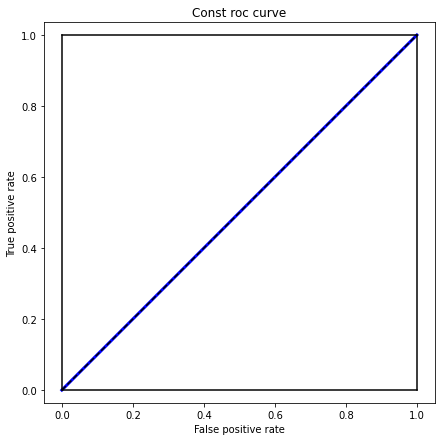

In [ ]:
plt.figure(figsize=(7, 7))
draw_roc_curve(const_pred, "Const roc curve")

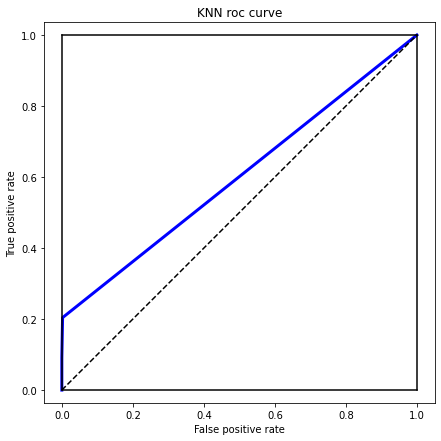

In [ ]:
plt.figure(figsize=(7, 7))
draw_roc_curve(knn_pred_proba, "KNN roc curve")

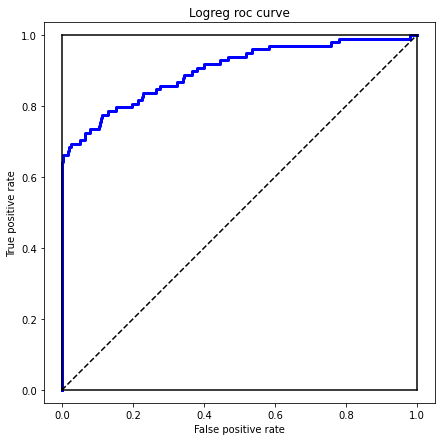

In [ ]:
plt.figure(figsize=(7, 7))
draw_roc_curve(logreg_pred_proba, "Logreg roc curve")

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Я бы максимизировал метрику ROC-AUC для логистической регрессии. Она лучше показывает точность модели, учитывая, что класса 0 больше.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Применим стандартизацию

In [ ]:
sdc = StandardScaler()
X_sdc = sdc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sdc, y.values, 
                                                    test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

Кроссвалидация + подбор гиперпараметров для линейной регрессии

In [ ]:
grid_logreg = {"penalty": ['l1', 'l2', "elasticnet", "none"],
               "C": np.arange(1.0, 3.0, 0.5),
               "random_state": [42]}

cross_val_logreg = GridSearchCV(LogisticRegression(), grid_logreg, cv=5, verbose=3)
cross_val_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..C=1.0, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END ..C=1.0, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 3/5] END ..C=1.0, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 4/5] END ..C=1.0, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END ..C=1.0, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, penalty=l2, random_state=42;, score=0.999 total time=   2.0s
[CV 2/5] END C=1.0, penalty=l2, random_state=42;, score=0.999 total time=   2.2s
[CV 3/5] END C=1.0, penalty=l2, random_state=42;, score=0.999 total time=   2.2s
[CV 4/5] END C=1.0, penalty=l2, random_state=42;, score=0.999 total time=   2.3s
[CV 5/5] END C=1.0, penalty=l2, random_state=42;, score=0.999 total time=   2.3s
[CV 1/5] END C=1.0, penalty=elasticnet, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, penalty=elasticnet, ra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=1.5, penalty=none, random_state=42;, score=0.999 total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=1.5, penalty=none, random_state=42;, score=0.999 total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=1.5, penalty=none, random_state=42;, score=0.999 total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=1.5, penalty=none, random_state=42;, score=0.999 total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=1.5, penalty=none, random_state=42;, score=0.999 total time=   2.2s
[CV 1/5] END ..C=2.0, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END ..C=2.0, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 3/5] END ..C=2.0, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 4/5] END ..C=2.0, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END ..C=2.0, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END C=2.0, penalty=l2, random_state=42;, score=0.999 total time=   2.0s
[CV 2/5] END C=2.0, penalty=l2, random_state=42;, score=0.999 total time=   2.4s
[CV 3/5] END C=2.0, penalty=l2, random_state=42;, score=0.999 total time=   2.3s
[CV 4/5] END C=2.0, penalty=l2, random_state=42;, score=0.999 total time=   2.3s
[CV 5/5] END C=2.0, penalty=l2, random_state=42;, score=0.999 total time=   2.2s
[CV 1/5] END C=2.0, penalty=elasticnet, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END C=2.0, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=2.0, penalty=none, random_state=42;, score=0.999 total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=2.0, penalty=none, random_state=42;, score=0.999 total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=2.0, penalty=none, random_state=42;, score=0.999 total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=2.0, penalty=none, random_state=42;, score=0.999 total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=2.0, penalty=none, random_state=42;, score=0.999 total time=   2.2s
[CV 1/5] END ..C=2.5, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END ..C=2.5, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 3/5] END ..C=2.5, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 4/5] END ..C=2.5, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 5/5] END ..C=2.5, penalty=l1, random_state=42;, score=nan total time=   0.0s
[CV 1/5] END C=2.5, penalty=l2, random_state=42;, score=0.999 total time=   2.0s
[CV 2/5] END C=2.5, penalty=l2, random_state=42;, score=0.999 total time=   2.4s
[CV 3/5] END C=2.5, penalty=l2, random_state=42;, score=0.999 total time=   2.4s
[CV 4/5] END C=2.5, penalty=l2, random_state=42;, score=0.999 total time=   2.2s
[CV 5/5] END C=2.5, penalty=l2, random_state=42;, score=0.999 total time=   2.2s
[CV 1/5] END C=2.5, penalty=elasticnet, random_state=42;, score=nan total time=   0.0s
[CV 2/5] END C=2.5, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=2.5, penalty=none, random_state=42;, score=0.999 total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=2.5, penalty=none, random_state=42;, score=0.999 total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=2.5, penalty=none, random_state=42;, score=0.999 total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=2.5, penalty=none, random_state=42;, score=0.999 total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=2.5, penalty=none, random_state=42;, score=0.999 total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1. , 1.5, 2. , 2.5]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [42]},
             verbose=3)

In [ ]:
cross_val_logreg.best_params_

{'C': 1.0, 'penalty': 'none', 'random_state': 42}

In [ ]:
cross_val_logreg_pred_proba = cross_val_logreg.predict_proba(X_test)[:, 1]
cross_val_logreg_pred = cross_val_logreg.predict(X_test)

0.9746656541063246


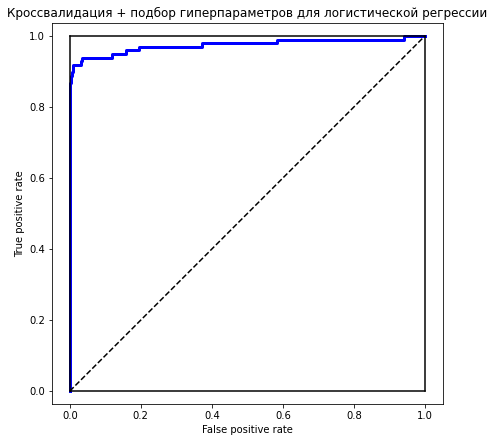

In [ ]:
print(roc_auc_score(y_test, cross_val_logreg_pred_proba))
plt.figure(figsize=(7, 7))
draw_roc_curve(cross_val_logreg_pred_proba, "Кроссвалидация + подбор гиперпараметров для логистической регрессии")

**ROC-AUC** повысился на 7%

**F1** мера повысилась на 11%

**Precision** повысился на 25%

In [ ]:
bin_metrics = {"LogLos": log_loss, "Accuracy": accuracy_score, 
               "Precision": precision_score, "Recall": recall_score, 
               "F1": f1_score}

for name_metric, metric in bin_metrics.items():
  print(name_metric)
  metric_score1 = round(metric(y_test, logreg_pred), 2)
  metric_score2 = round(metric(y_test, cross_val_logreg_pred), 2)

  print(f"LogReg = {metric_score1}")
  print(f"Improved LogReg = {metric_score2}")
  print(f"Difference = {round(metric_score2 - metric_score1, 2)}")
  print()

metric_score1 = round(roc_auc_score(y_test, logreg_pred_proba), 2)
metric_score2 = round(roc_auc_score(y_test, cross_val_logreg_pred_proba), 2)
print("ROC-AUC")
print(f"LogReg = {metric_score1}")
print(f"Improved LogReg = {metric_score2}")
print(f"Difference = {round(metric_score2 - metric_score1, 2)}")

LogLos
LogReg = 0.05
Improved LogReg = 0.03
Difference = -0.02

Accuracy
LogReg = 1.0
Improved LogReg = 1.0
Difference = 0.0

Precision
LogReg = 0.61
Improved LogReg = 0.86
Difference = 0.25

Recall
LogReg = 0.56
Improved LogReg = 0.58
Difference = 0.02

F1
LogReg = 0.59
Improved LogReg = 0.7
Difference = 0.11

ROC-AUC
LogReg = 0.9
Improved LogReg = 0.97
Difference = 0.07


Обучим дерево решений и случайный лес

In [ ]:
grid_tree = {"criterion": ("gini", "entropy"),
             "max_depth": np.arange(3, 20),
             "splitter": ["best", "random"],
             "random_state": [42]}

tree = GridSearchCV(DecisionTreeClassifier(), grid_tree, cv=5, verbose=3)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 68 candidates, totalling 340 fits
[CV 1/5] END criterion=gini, max_depth=3, random_state=42, splitter=best;, score=0.999 total time=   3.3s
[CV 2/5] END criterion=gini, max_depth=3, random_state=42, splitter=best;, score=0.999 total time=   3.3s
[CV 3/5] END criterion=gini, max_depth=3, random_state=42, splitter=best;, score=0.999 total time=   3.3s
[CV 4/5] END criterion=gini, max_depth=3, random_state=42, splitter=best;, score=0.999 total time=   3.3s
[CV 5/5] END criterion=gini, max_depth=3, random_state=42, splitter=best;, score=0.999 total time=   3.3s
[CV 1/5] END criterion=gini, max_depth=3, random_state=42, splitter=random;, score=0.999 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, random_state=42, splitter=random;, score=0.999 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, random_state=42, splitter=random;, score=0.999 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, random_state=42, splitter=random;, score=0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'random_state': [42], 'splitter': ['best', 'random']},
             verbose=3)

In [ ]:
tree.best_params_

{'criterion': 'gini', 'max_depth': 6, 'random_state': 42, 'splitter': 'best'}

In [ ]:
grid_random_forest = {"criterion": ["gini", "entropy"],
                      "random_state": [42],
                      "max_depth": [6]}

random_forest = GridSearchCV(RandomForestClassifier(), grid_random_forest, cv=5, verbose=3)

random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END criterion=gini, max_depth=6, random_state=42;, score=1.000 total time= 1.3min
[CV 2/5] END criterion=gini, max_depth=6, random_state=42;, score=0.999 total time= 1.3min
[CV 3/5] END criterion=gini, max_depth=6, random_state=42;, score=0.999 total time= 1.3min
[CV 4/5] END criterion=gini, max_depth=6, random_state=42;, score=1.000 total time= 1.3min
[CV 5/5] END criterion=gini, max_depth=6, random_state=42;, score=1.000 total time= 1.3min
[CV 1/5] END criterion=entropy, max_depth=6, random_state=42;, score=1.000 total time= 1.7min
[CV 2/5] END criterion=entropy, max_depth=6, random_state=42;, score=0.999 total time= 1.7min
[CV 3/5] END criterion=entropy, max_depth=6, random_state=42;, score=0.999 total time= 1.7min
[CV 4/5] END criterion=entropy, max_depth=6, random_state=42;, score=0.999 total time= 1.7min
[CV 5/5] END criterion=entropy, max_depth=6, random_state=42;, score=1.000 total time= 1.7min


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6],
                         'random_state': [42]},
             verbose=3)

In [ ]:
random_forest.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'random_state': 42}

In [ ]:
tree_pred_proba = tree.predict_proba(X_test)[:, 1]
random_forest_pred_proba = random_forest.predict_proba(X_test)[:, 1]

tree_pred = tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

Сравнение показателей

Случайный лес лучшая модель почти по всем метрикам

In [ ]:
bin_metrics = {"LogLos": log_loss, "Accuracy": accuracy_score, 
               "Precision": precision_score, "Recall": recall_score, 
               "F1": f1_score}

for name_metric, metric in bin_metrics.items():
  print(name_metric)
  metric_score1 = round(metric(y_test, logreg_pred), 2)
  metric_score2 = round(metric(y_test, cross_val_logreg_pred), 2)
  metric_score3 = round(metric(y_test, tree_pred), 2)
  metric_score4 = round(metric(y_test, random_forest_pred), 2)

  print(f"LogReg = {metric_score1}")
  print(f"Improved LogReg = {metric_score2}")
  print(f"Decision tree = {metric_score3}")
  print(f"Random forest = {metric_score4}")
  print()

metric_score1 = round(roc_auc_score(y_test, logreg_pred_proba), 2)
metric_score2 = round(roc_auc_score(y_test, cross_val_logreg_pred_proba), 2)
metric_score3 = round(roc_auc_score(y_test, tree_pred_proba), 2)
metric_score4 = round(roc_auc_score(y_test, random_forest_pred_proba), 2)

print("ROC-AUC")
print(f"LogReg = {metric_score1}")
print(f"Improved LogReg = {metric_score2}")
print(f"Decision tree = {metric_score3}")
print(f"Random forest = {metric_score4}")

LogLos
LogReg = 0.05
Improved LogReg = 0.03
Decision tree = 0.02
Random forest = 0.02

Accuracy
LogReg = 1.0
Improved LogReg = 1.0
Decision tree = 1.0
Random forest = 1.0

Precision
LogReg = 0.61
Improved LogReg = 0.86
Decision tree = 0.9
Random forest = 0.96

Recall
LogReg = 0.56
Improved LogReg = 0.58
Decision tree = 0.8
Random forest = 0.76

F1
LogReg = 0.59
Improved LogReg = 0.7
Decision tree = 0.84
Random forest = 0.85

ROC-AUC
LogReg = 0.9
Improved LogReg = 0.97
Decision tree = 0.91
Random forest = 0.98


Графики

In [ ]:
def draw_plot(curve, xlabel, ylabel, title):
  plt.figure(figsize=(7, 7))

  fpr0, tpr0, thresholds0 = curve(y_test, logreg_pred_proba)
  fpr1, tpr1, thresholds1 = curve(y_test, cross_val_logreg_pred_proba)
  fpr2, tpr2, thresholds2 = curve(y_test, tree_pred_proba)
  fpr3, tpr3, thresholds3 = curve(y_test, random_forest_pred_proba)

  plt.plot(fpr0, tpr0, 'b', linewidth=3)
  plt.plot(fpr1, tpr1, 'g', linewidth=3)
  plt.plot(fpr2, tpr2, 'c', linewidth=3)
  plt.plot(fpr3, tpr3, 'r', linewidth=3)

  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot([0, 0], [0, 1], 'k')
  plt.plot([1, 1], [0, 1], 'k')
  plt.plot([0, 1], [0, 0], 'k')
  plt.plot([0, 1], [1, 1], 'k')

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.legend(("Простой логрег", "Улучшенный логрег", "Дерево решений", "Случайный лес"),
            shadow=True, loc=(1, 1))

  plt.title(title)

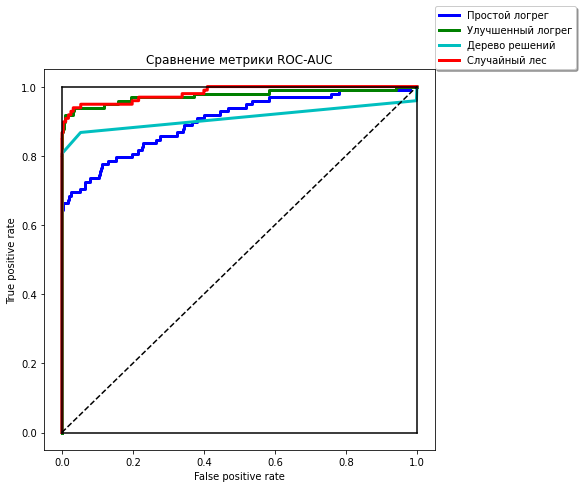

In [ ]:
draw_plot(roc_curve, 'False positive rate', 'True positive rate', "Сравнение метрики ROC-AUC")

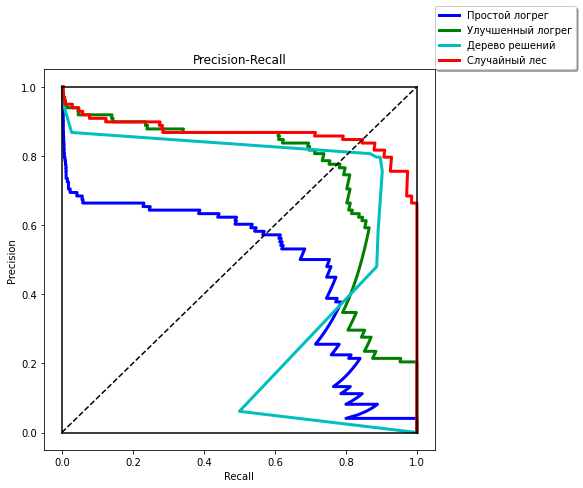

In [ ]:
draw_plot(precision_recall_curve, "Recall", "Precision", "Precision-Recall")

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Возьмем датасет c небинарной (6 классов) классификацией - определение профиля человека

https://www.kaggle.com/scarecrow2020/tech-students-profile-prediction

In [ ]:
data = pd.read_csv("dataset-tortuga.csv")
data.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end


In [ ]:
data.shape # больше 500 объектов

(20000, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

In [ ]:
profile_counts = data["PROFILE"].value_counts()
profile_counts

advanced_backend         3339
advanced_front_end       3337
beginner_front_end       3335
beginner_backend         3332
advanced_data_science    3330
beginner_data_science    3327
Name: PROFILE, dtype: int64

In [ ]:
nan_columns = ("HOURS_DATASCIENCE", "HOURS_BACKEND", "HOURS_FRONTEND", 
               "NUM_COURSES_BEGINNER_DATASCIENCE", "NUM_COURSES_BEGINNER_BACKEND",
               "NUM_COURSES_BEGINNER_FRONTEND", "NUM_COURSES_ADVANCED_DATASCIENCE",
               "NUM_COURSES_ADVANCED_BACKEND", "NUM_COURSES_ADVANCED_FRONTEND",
               "AVG_SCORE_DATASCIENCE", "AVG_SCORE_BACKEND", "AVG_SCORE_FRONTEND")

for column in nan_columns:
  data[column].fillna(data[column].mean(), inplace=True)
data.isna().mean().sum()

0.0

Переведем профиль в числовой тип

In [ ]:
encoder = LabelEncoder()
encoder.fit(data["PROFILE"])
encoder.classes_

array(['advanced_backend', 'advanced_data_science', 'advanced_front_end',
       'beginner_backend', 'beginner_data_science', 'beginner_front_end'],
      dtype=object)

In [ ]:
data["PROFILE"] = encoder.transform(data["PROFILE"])

Посмотрим на матрицу корреляции

Видно, что есть зависимость с кол-во часов, потраченных на datasience и frontend/ И кол-во курсов на back-end разработку

Text(0.5, 1.0, 'Матрица корреляции')

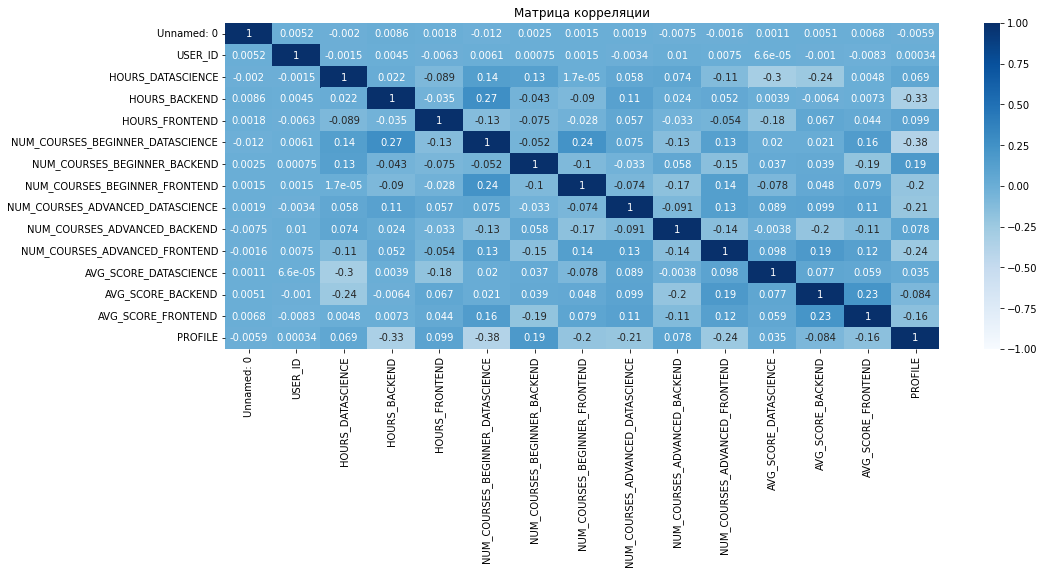

In [ ]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")

heatmap.set_title("Матрица корреляции")

In [ ]:
X = data.drop(columns=['PROFILE', "Unnamed: 0", "NAME", "USER_ID"]) 
y = data['PROFILE']

Применим стандартизацию

In [ ]:
sdc = StandardScaler()
X_sdc = sdc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sdc, y.values, 
                                                    test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 12), (4000, 12), (16000,), (4000,))

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

Константа, всегда выбираем класс, который встечается чаще

In [ ]:
const_pred = data["PROFILE"].max() + np.zeros(len(y_test))

Рандомно выбираем профиль - от 0 до 5 (вторая константа)

In [ ]:
prob_pred = np.random.randint(5, size=len(y_test))

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
logreg = LogisticRegression(random_state=42, multi_class='multinomial')
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

KNN лучше всех...

In [ ]:
metrics = {"Precision": precision_score, "Recall": recall_score, 
           "F1": f1_score}

for name_metric, metric in metrics.items():
  print(name_metric)
  print(f"Const1 = {metric(y_test, const_pred, average='micro')}")
  print(f"Const2 = {metric(y_test, prob_pred, average='micro')}")
  print(f"KNN = {metric(y_test, knn_pred, average='micro')}")
  print(f"Logreg = {metric(y_test, logreg_pred, average='micro')}")
  print()

print("Accuracy")
print(f"Const1 = {accuracy_score(y_test, const_pred)}")
print(f"Const2 = {accuracy_score(y_test, prob_pred)}")
print(f"KNN = {accuracy_score(y_test, knn_pred)}")
print(f"Logreg = {accuracy_score(y_test, logreg_pred)}")

Precision
Const1 = 0.1635
Const2 = 0.1635
KNN = 0.9325
Logreg = 0.696

Recall
Const1 = 0.1635
Const2 = 0.1635
KNN = 0.9325
Logreg = 0.696

F1
Const1 = 0.1635
Const2 = 0.1635
KNN = 0.9325
Logreg = 0.696

Accuracy
Const1 = 0.1635
Const2 = 0.1635
KNN = 0.9325
Logreg = 0.696


Попробуем улучшить логистическую регрессию

In [ ]:
logreg_grid = {"penalty": ['l1', 'l2', "elasticnet", "none"],
               'solver': ['newton-cg', 'saga','sag', "lbfgs"],
               "C": np.arange(1.0, 3.0, 0.5),
               "random_state": [42],
               "multi_class": ['multinomial']}

cross_val_logreg = GridSearchCV(LogisticRegression(), logreg_grid, cv=5, verbose=0)
cross_val_logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1. , 1.5, 2. , 2.5]),
                         'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [42],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs']})

In [ ]:
cross_val_logreg.best_params_

{'C': 1.0,
 'multi_class': 'multinomial',
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'saga'}

In [ ]:
cross_val_logreg_pred = cross_val_logreg.predict(X_test)
accuracy_score(y_test, cross_val_logreg_pred)

0.69575

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy', cv=cv)
scores.mean()

0.7057916666666667

Логрег работает плохо - лучший результат 70%. У KNN - 93%

Попоробуем другие модели

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Буду максимизировать accuracy. Классы, которые мы предсказываем сбалансированны. Поэтому доля правильно угаданных объектов будет хорошо показывать истину

In [ ]:
def draw_scatter(accuracy, title):
  plt.plot(accuracy)
  plt.scatter(np.arange(5), accuracy, c="r")
  plt.title(title)
  plt.xlabel("Номер запуска")
  plt.ylabel("Точность")
  plt.show()

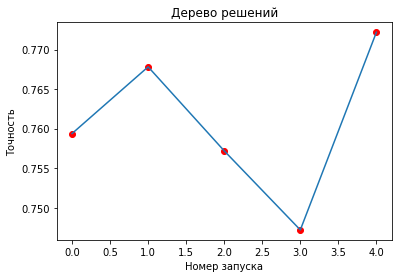

0.76075


In [ ]:
tree_accuracy = cross_val_score(DecisionTreeClassifier(random_state=42), X_train, y_train, scoring='accuracy', cv=5)
draw_scatter(tree_accuracy, "Дерево решений")
print(tree_accuracy.mean())

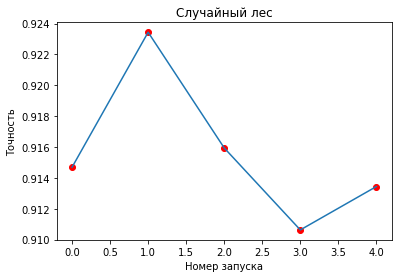

0.915625


In [ ]:
random_forest_accuracy = cross_val_score(RandomForestClassifier(random_state=42), X_train, y_train, scoring='accuracy', cv=5)
draw_scatter(random_forest_accuracy, "Случайный лес")
print(random_forest_accuracy.mean())

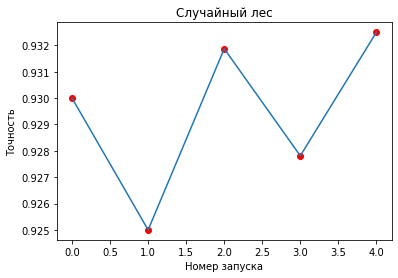

0.9294375


In [ ]:
knn_accuracy = cross_val_score(KNeighborsClassifier(), X_train, y_train, scoring='accuracy', cv=5)
draw_scatter(knn_accuracy, "Случайный лес")
print(knn_accuracy.mean())

KNN хорошо работает на этом датасете. Примерно с такой же точностью работает случайный лес. Дерево решений и логистическая регрессия работают хуже.

In [ ]:
knn_grid = {"n_neighbors": np.arange(4, 10)}

knn_cross_val = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=5, verbose=0)
knn_cross_val.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([4, 5, 6, 7, 8, 9])})

In [ ]:
knn_cross_val.best_params_

{'n_neighbors': 7}

In [ ]:
knn_cross_val_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, knn_cross_val_pred)

0.9325